# RAMP: Purchasing Intention prediction for online shoppers

*Aymane Rahmoune, Haocheng LIU, Ly An CHHAY, Mohammed Jawhar, Nasr El Hamzaoui, Wiam Adnan*

This notebook is part of a project aiming to create a Data Science challenge on the RAMP platform, for the M2 DS (2023/2024) Datacamp course.

<div align="center">
  <img src="./logo_ip-paris.png"/>
</div>

In the current dynamic landscape of retail and e-commerce, the integration of Artificial Intelligence and recommender systems has significantly boosted sales performance and revolutionized marketing strategies.  Particularly, to engage consumers, it is important to understand their preferences and propose correspondly special deals and promotions. Historically, such offers were indiscriminately proposed to all website visitors, without consideration of individual interests. But then, after recognizing the inefficiency of this approach, online retailers began to leverage detailed analysis of visitor behavior to identify potential buyers. By deploying recommendation systems, retailers have been able to target these potential customers more directly with personalized offers through email or phone, hoping to bring them back to buy something.

Recently, the demand for immediate, real-time solutions has led to the rise of a proactive approach. Instead of waiting until after someone visits a site to guess if they might want to buy something, this method tries to figure it out while they're still browsing to enhance conversion rates. It is like having a clever salesperson who knows who's just browsing and who's ready to buy, and offers them deals right then and there to get them to buy. 

In other words, this approach aim to detect users with high purchasing intention as soon as they connect to the e-commerce website and to offer content only to those who intend to complete a transaction. The advantage behind that is to avoid the risk of losing potential visitors who sometimes disconnect for trivial reasons (reception of a phone call, being disconnected for a while, etc.). In this callenge, we aim to design the first part of such a recommendation systems : a model able to detect wether a visitor is willing to buy something from the ecommerce platform or not.

## Dataset Description

We will use a dataset detailing 12330 sessions, each of a different user in a one year period. It comprises 10 numerical and 8 categorical attributes, with the 'Revenue' attribute serving as the class label. Metrics such as "Administrative," "Administrative Duration," "Informational," "Informational Duration," "Product Related," and "Product Related Duration" quantify the number of pages visited and the time spent on different page categories during a session. These values are derived from the URL information of the visited pages, dynamically updated in real-time as users navigate through the site. The features "Bounce Rate," "Exit Rate," and "Page Value" correspond to metrics measured by "Google Analytics" for each page in the e-commerce site. "Bounce Rate" indicates the percentage of visitors who enter a page and leave without triggering additional requests to the analytics server. "Exit Rate" calculates the percentage of pageviews that were the last in a session. Meanwhile, "Page Value" represents the average value of a page visited before completing an e-commerce transaction. The "Special Day" feature gauges the proximity of site visits to specific occasions (e.g., Mother’s Day, Valentine's Day), where transactions are more likely to occur. This attribute's value considers e-commerce dynamics, such as the duration between the order date and delivery date. For instance, around Valentine’s Day, the value is nonzero between February 2 and February 12, zero before and after unless close to another special day, reaching a maximum of 1 on February 8. Additionally, the dataset includes information on the operating system, browser, region, traffic type, visitor type (returning or new), a Boolean indicator for weekend visits, and the month of the year.

The dataset was taken from:
Sakar,C. and Kastro,Yomi. (2018). Online Shoppers Purchasing Intention Dataset. UCI Machine Learning Repository. https://doi.org/10.24432/C5F88Q.

## Requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression

## Importing Data

In [3]:
df = pd.read_csv('data/train.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,8,732.250000,0,0.0,34,1345.755952,0.005128,0.013342,12.274195,0.8,May,3,3,3,2,Returning_Visitor,False,False
1,0,0.000000,0,0.0,4,157.200000,0.040000,0.100000,0.000000,0.0,Oct,1,8,3,1,Returning_Visitor,True,False
2,0,0.000000,0,0.0,4,42.000000,0.000000,0.050000,0.000000,0.0,Dec,2,10,1,2,Returning_Visitor,False,False
3,2,338.000000,0,0.0,17,1205.566667,0.012500,0.037500,19.236250,0.8,May,3,2,2,2,Returning_Visitor,False,True
4,0,0.000000,0,0.0,32,827.646212,0.000000,0.000587,54.676348,0.0,Mar,2,2,7,2,Returning_Visitor,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9859,4,69.000000,1,0.0,19,580.500000,0.010526,0.049123,22.329347,0.0,May,2,2,1,3,Returning_Visitor,True,True
9860,4,16.666667,0,0.0,68,2593.741667,0.002941,0.012843,0.000000,0.0,Mar,2,2,4,8,Returning_Visitor,False,False
9861,0,0.000000,0,0.0,17,433.133333,0.023529,0.051961,0.000000,1.0,May,3,2,4,4,Returning_Visitor,True,False
9862,0,0.000000,0,0.0,73,2784.800000,0.002740,0.015318,6.135982,0.0,Nov,2,2,5,2,Returning_Visitor,True,False


The public set we will be working with consists of 9864 instances, and 18 features

## Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9864 entries, 0 to 9863
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9864 non-null   int64  
 1   Administrative_Duration  9864 non-null   float64
 2   Informational            9864 non-null   int64  
 3   Informational_Duration   9864 non-null   float64
 4   ProductRelated           9864 non-null   int64  
 5   ProductRelated_Duration  9864 non-null   float64
 6   BounceRates              9864 non-null   float64
 7   ExitRates                9864 non-null   float64
 8   PageValues               9864 non-null   float64
 9   SpecialDay               9864 non-null   float64
 10  Month                    9864 non-null   object 
 11  OperatingSystems         9864 non-null   int64  
 12  Browser                  9864 non-null   int64  
 13  Region                   9864 non-null   int64  
 14  TrafficType             

Contrary to the description provided earlier for the dataset, upon importing, it appears that it contains 4 categorical variables and 14 numerical ones. This discrepancy arises because the columns 'OperatingSystems', 'Browser', 'Region', and 'TrafficType' are treated as numeric (int64) by pandas during the import process.

Let's convert them to their original type:


In [5]:
df[['OperatingSystems', 'Browser', 'Region', 'TrafficType']] = df[['OperatingSystems', 'Browser', 'Region', 'TrafficType']].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9864 entries, 0 to 9863
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9864 non-null   int64  
 1   Administrative_Duration  9864 non-null   float64
 2   Informational            9864 non-null   int64  
 3   Informational_Duration   9864 non-null   float64
 4   ProductRelated           9864 non-null   int64  
 5   ProductRelated_Duration  9864 non-null   float64
 6   BounceRates              9864 non-null   float64
 7   ExitRates                9864 non-null   float64
 8   PageValues               9864 non-null   float64
 9   SpecialDay               9864 non-null   float64
 10  Month                    9864 non-null   object 
 11  OperatingSystems         9864 non-null   object 
 12  Browser                  9864 non-null   object 
 13  Region                   9864 non-null   object 
 14  TrafficType             

Given that there are no missing values, we can check the existence of duplicated instances to guarantee the dataset consistency

In [6]:
df.duplicated().sum()

91

The best way to deal with those 91 duplicated instances to to drop them and keep only one unique instance of each

In [7]:
df.drop_duplicates(inplace=True, keep='first')

As mentionned before, the dataset shows a significant imbalance in the target classes : about 85% of visitors do not make a purchase. This imbalance could affect the model's accuracy and introduce a bias. However, we will not modify the class distribution at this stage, allowing participants the freedom to address this issue as they see fit.

Revenue
False    0.843856
True     0.156144
Name: proportion, dtype: float64


<Axes: xlabel='Revenue', ylabel='count'>

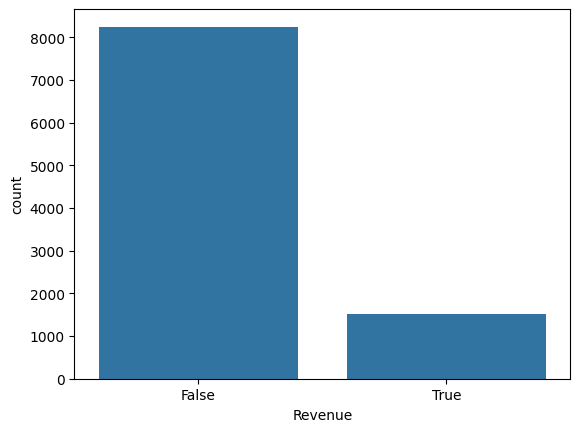

In [8]:
# Percentage of each class in the 'Revenue' column
print(df['Revenue'].value_counts(normalize = True))
# Class counts for the 'Revenue' column
sns.barplot(df['Revenue'].value_counts())

Now, let us explore the distributions of the categorical and numeric variables with respect to the Revenue

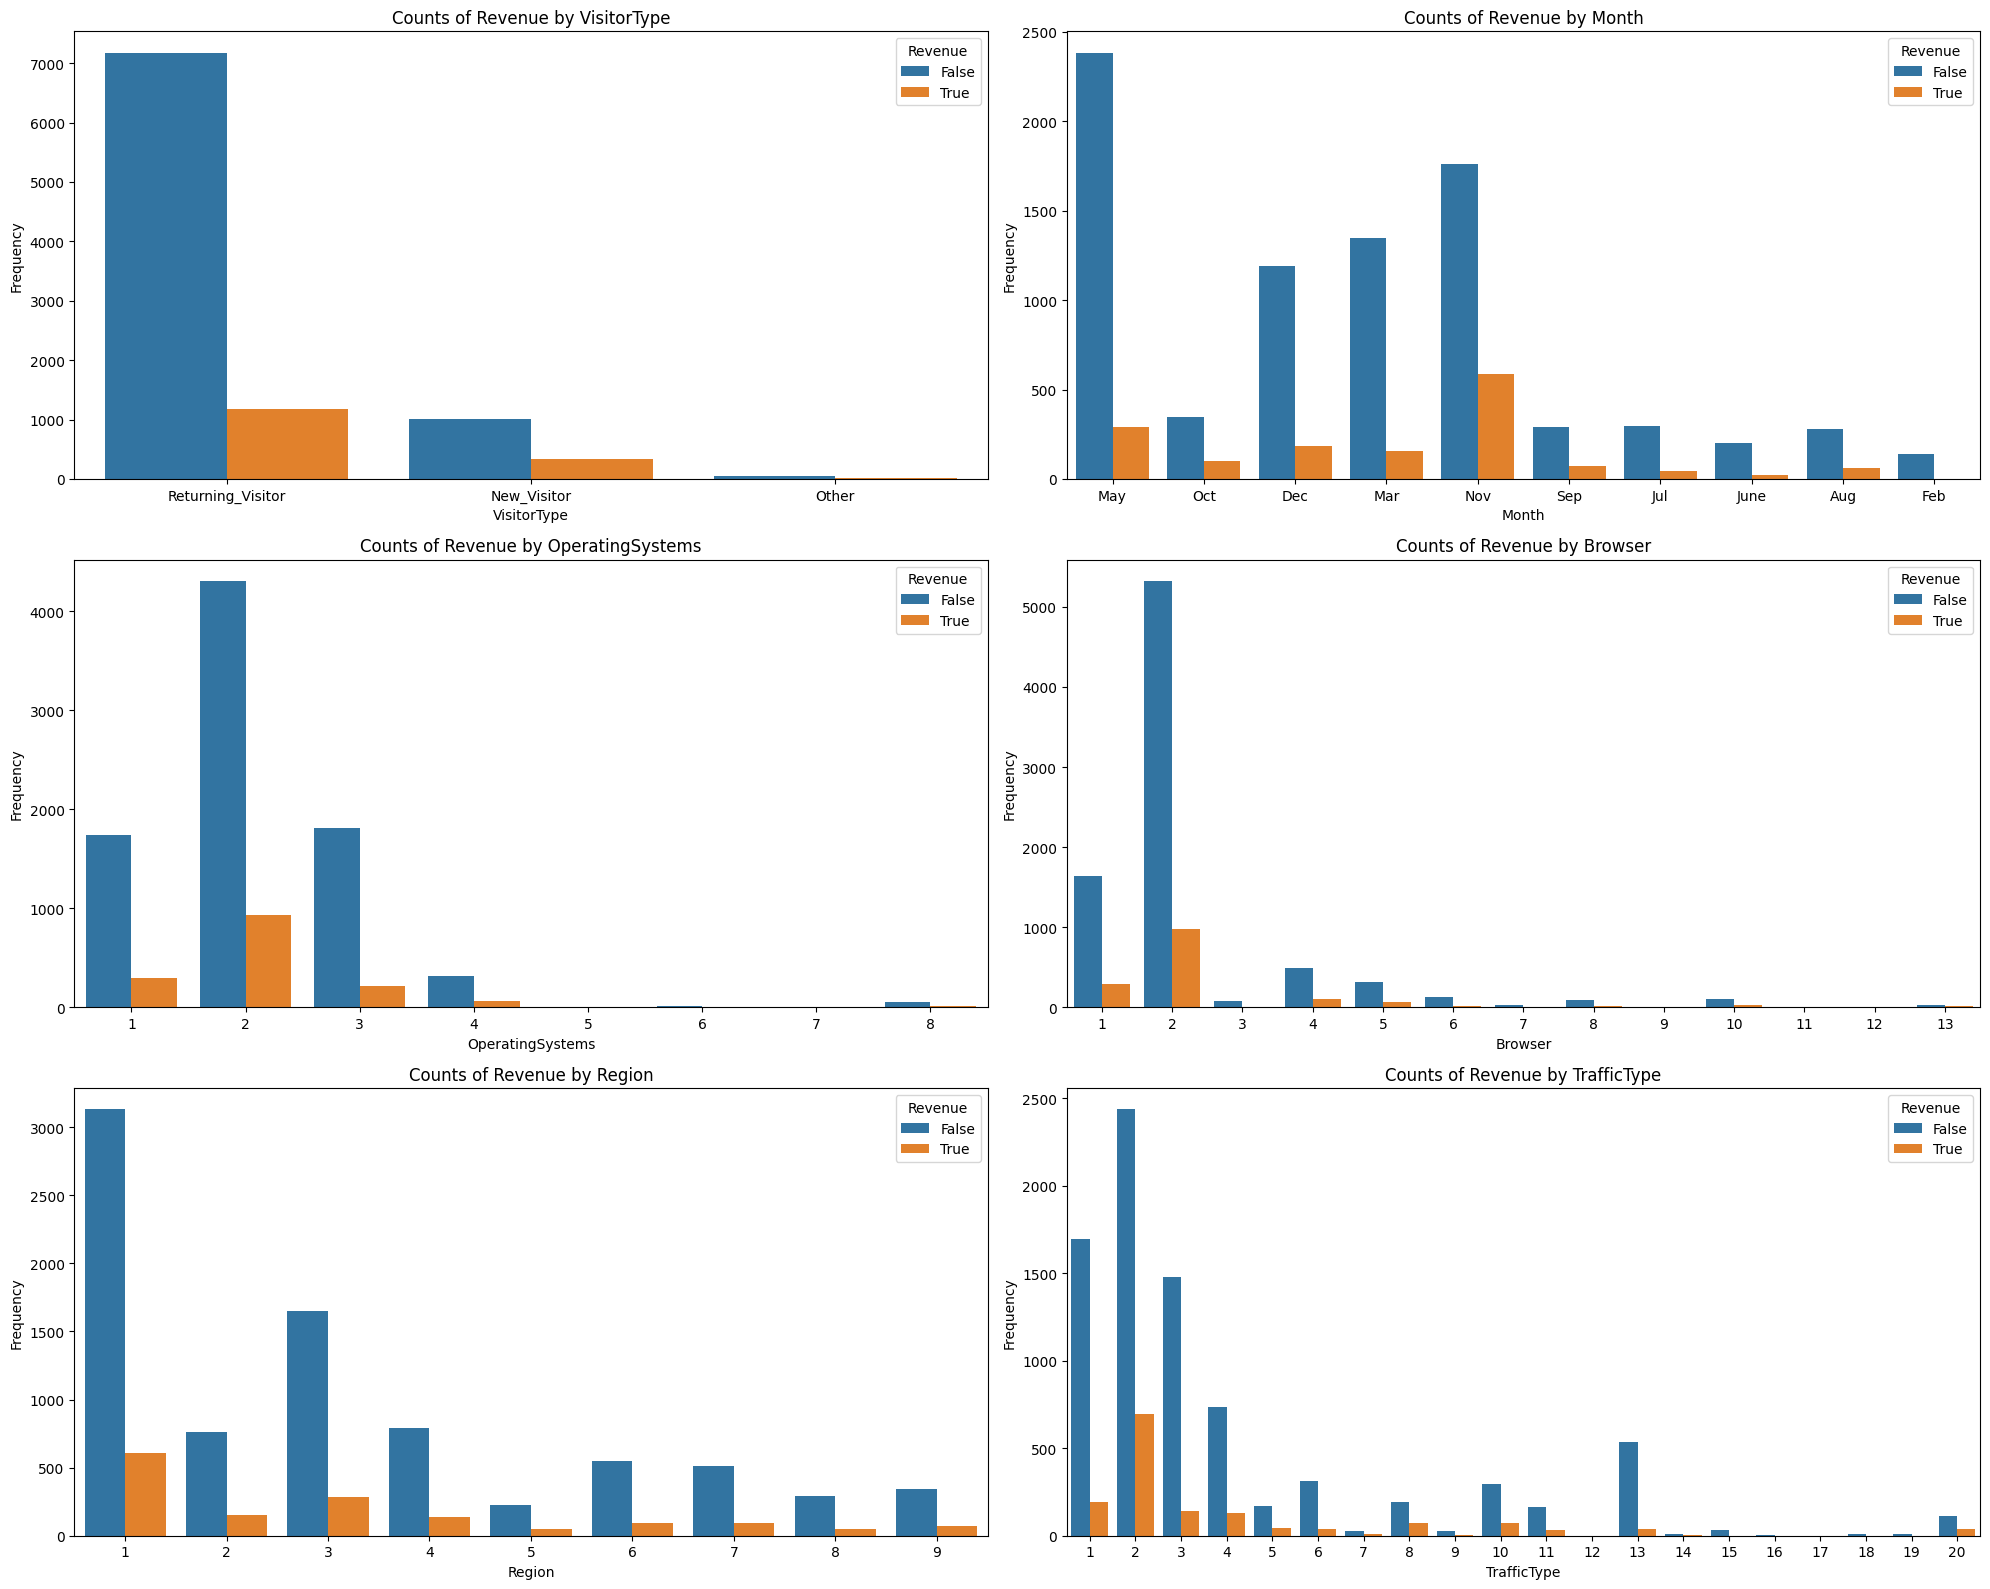

In [9]:
# Counts of 'Revenue' classes for each categorical column
fig, axes = plt.subplots(3, 2, figsize=(20, 16))

for col, ax in zip(['VisitorType', 'Month','OperatingSystems', 'Browser', 'Region', 'TrafficType'], axes.flatten()):
    sns.countplot(data=df, x=col, ax=ax, hue='Revenue')
    ax.set_title(f'Counts of Revenue by {col}')
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

We observe for example that:
* Months like May and November have higher purchase rates than the other periods, which can be attributed to holiday shopping and sales
* Returning visitors have higher purchase rates than new visitors, showing the necessity of focusing on customer retention alongside improving conversion rates.

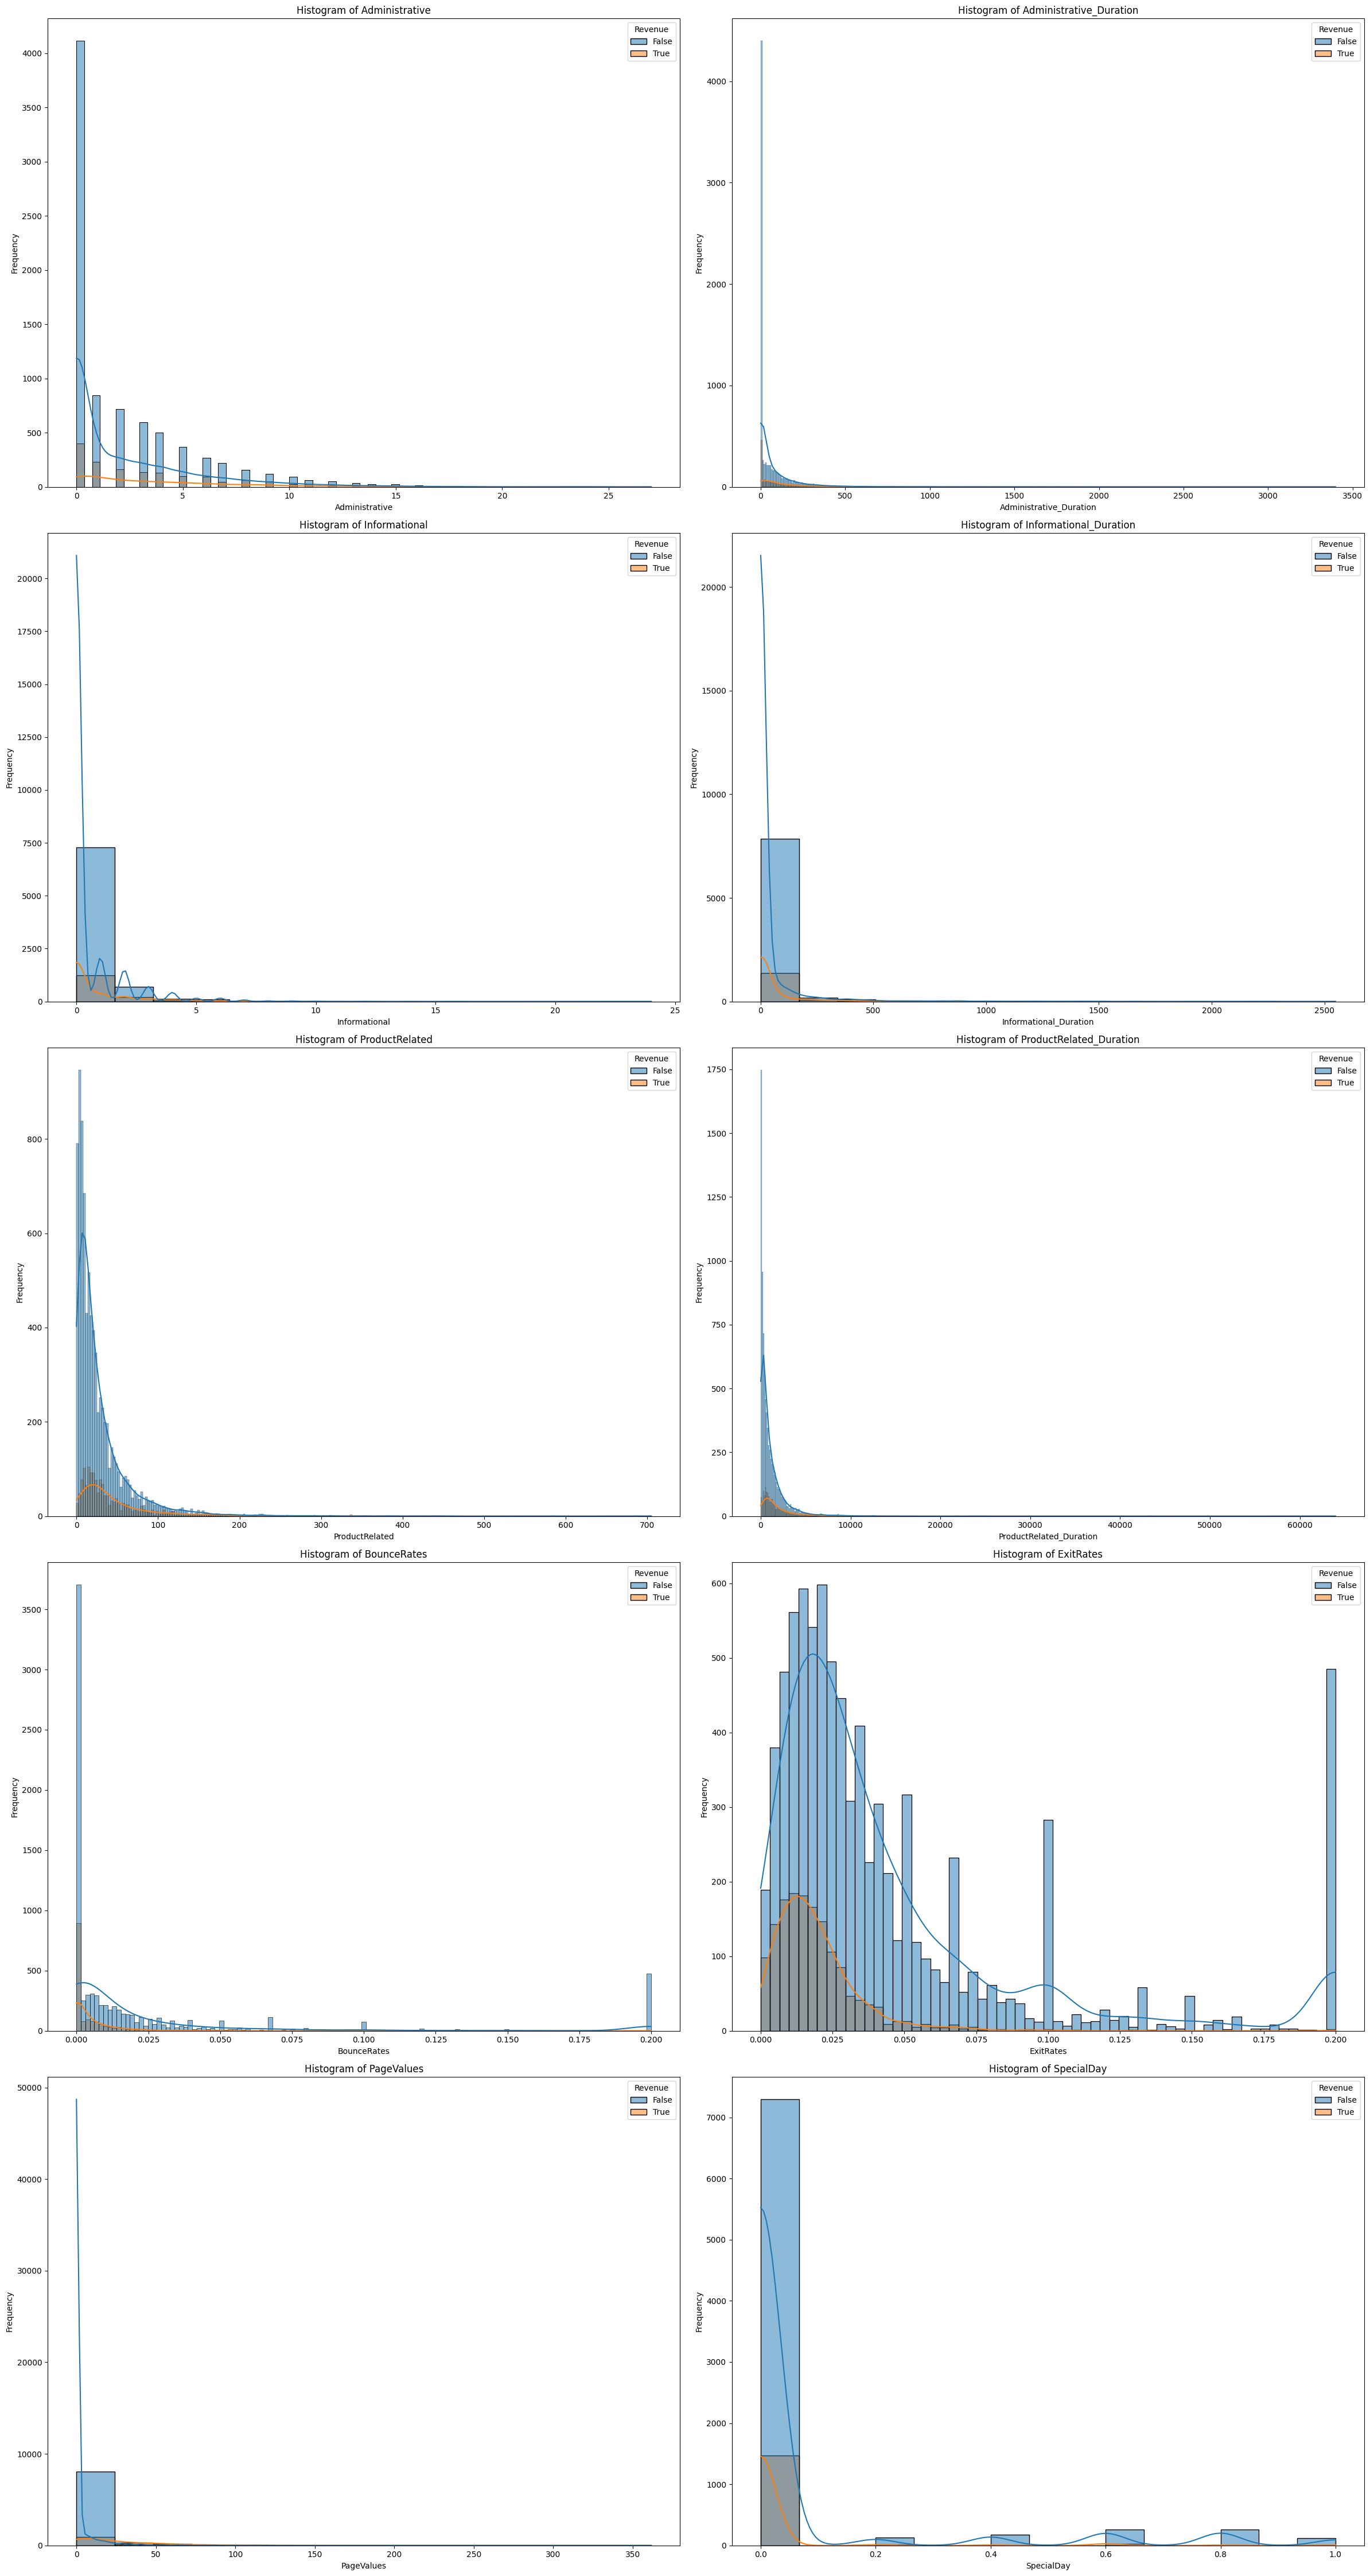

In [10]:
# histogram of the numerical columns
fig, ax = plt.subplots(5, 2, figsize=(24, 45))
for col, ax in zip(df.select_dtypes('number').columns, ax.flatten()):
    sns.histplot(data = df, x = col, kde=True, hue = "Revenue" , ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()


The histograms presented offer valuable insights into how different user behaviors and site interactions influence the probability of a session resulting in a transaction. Through detailed analysis of each histogram, we can derive numerous insights that may serve as critical components for feature engineering.

To better understand these interactions, we can use also a pair plot that represents the relationship between the different features:

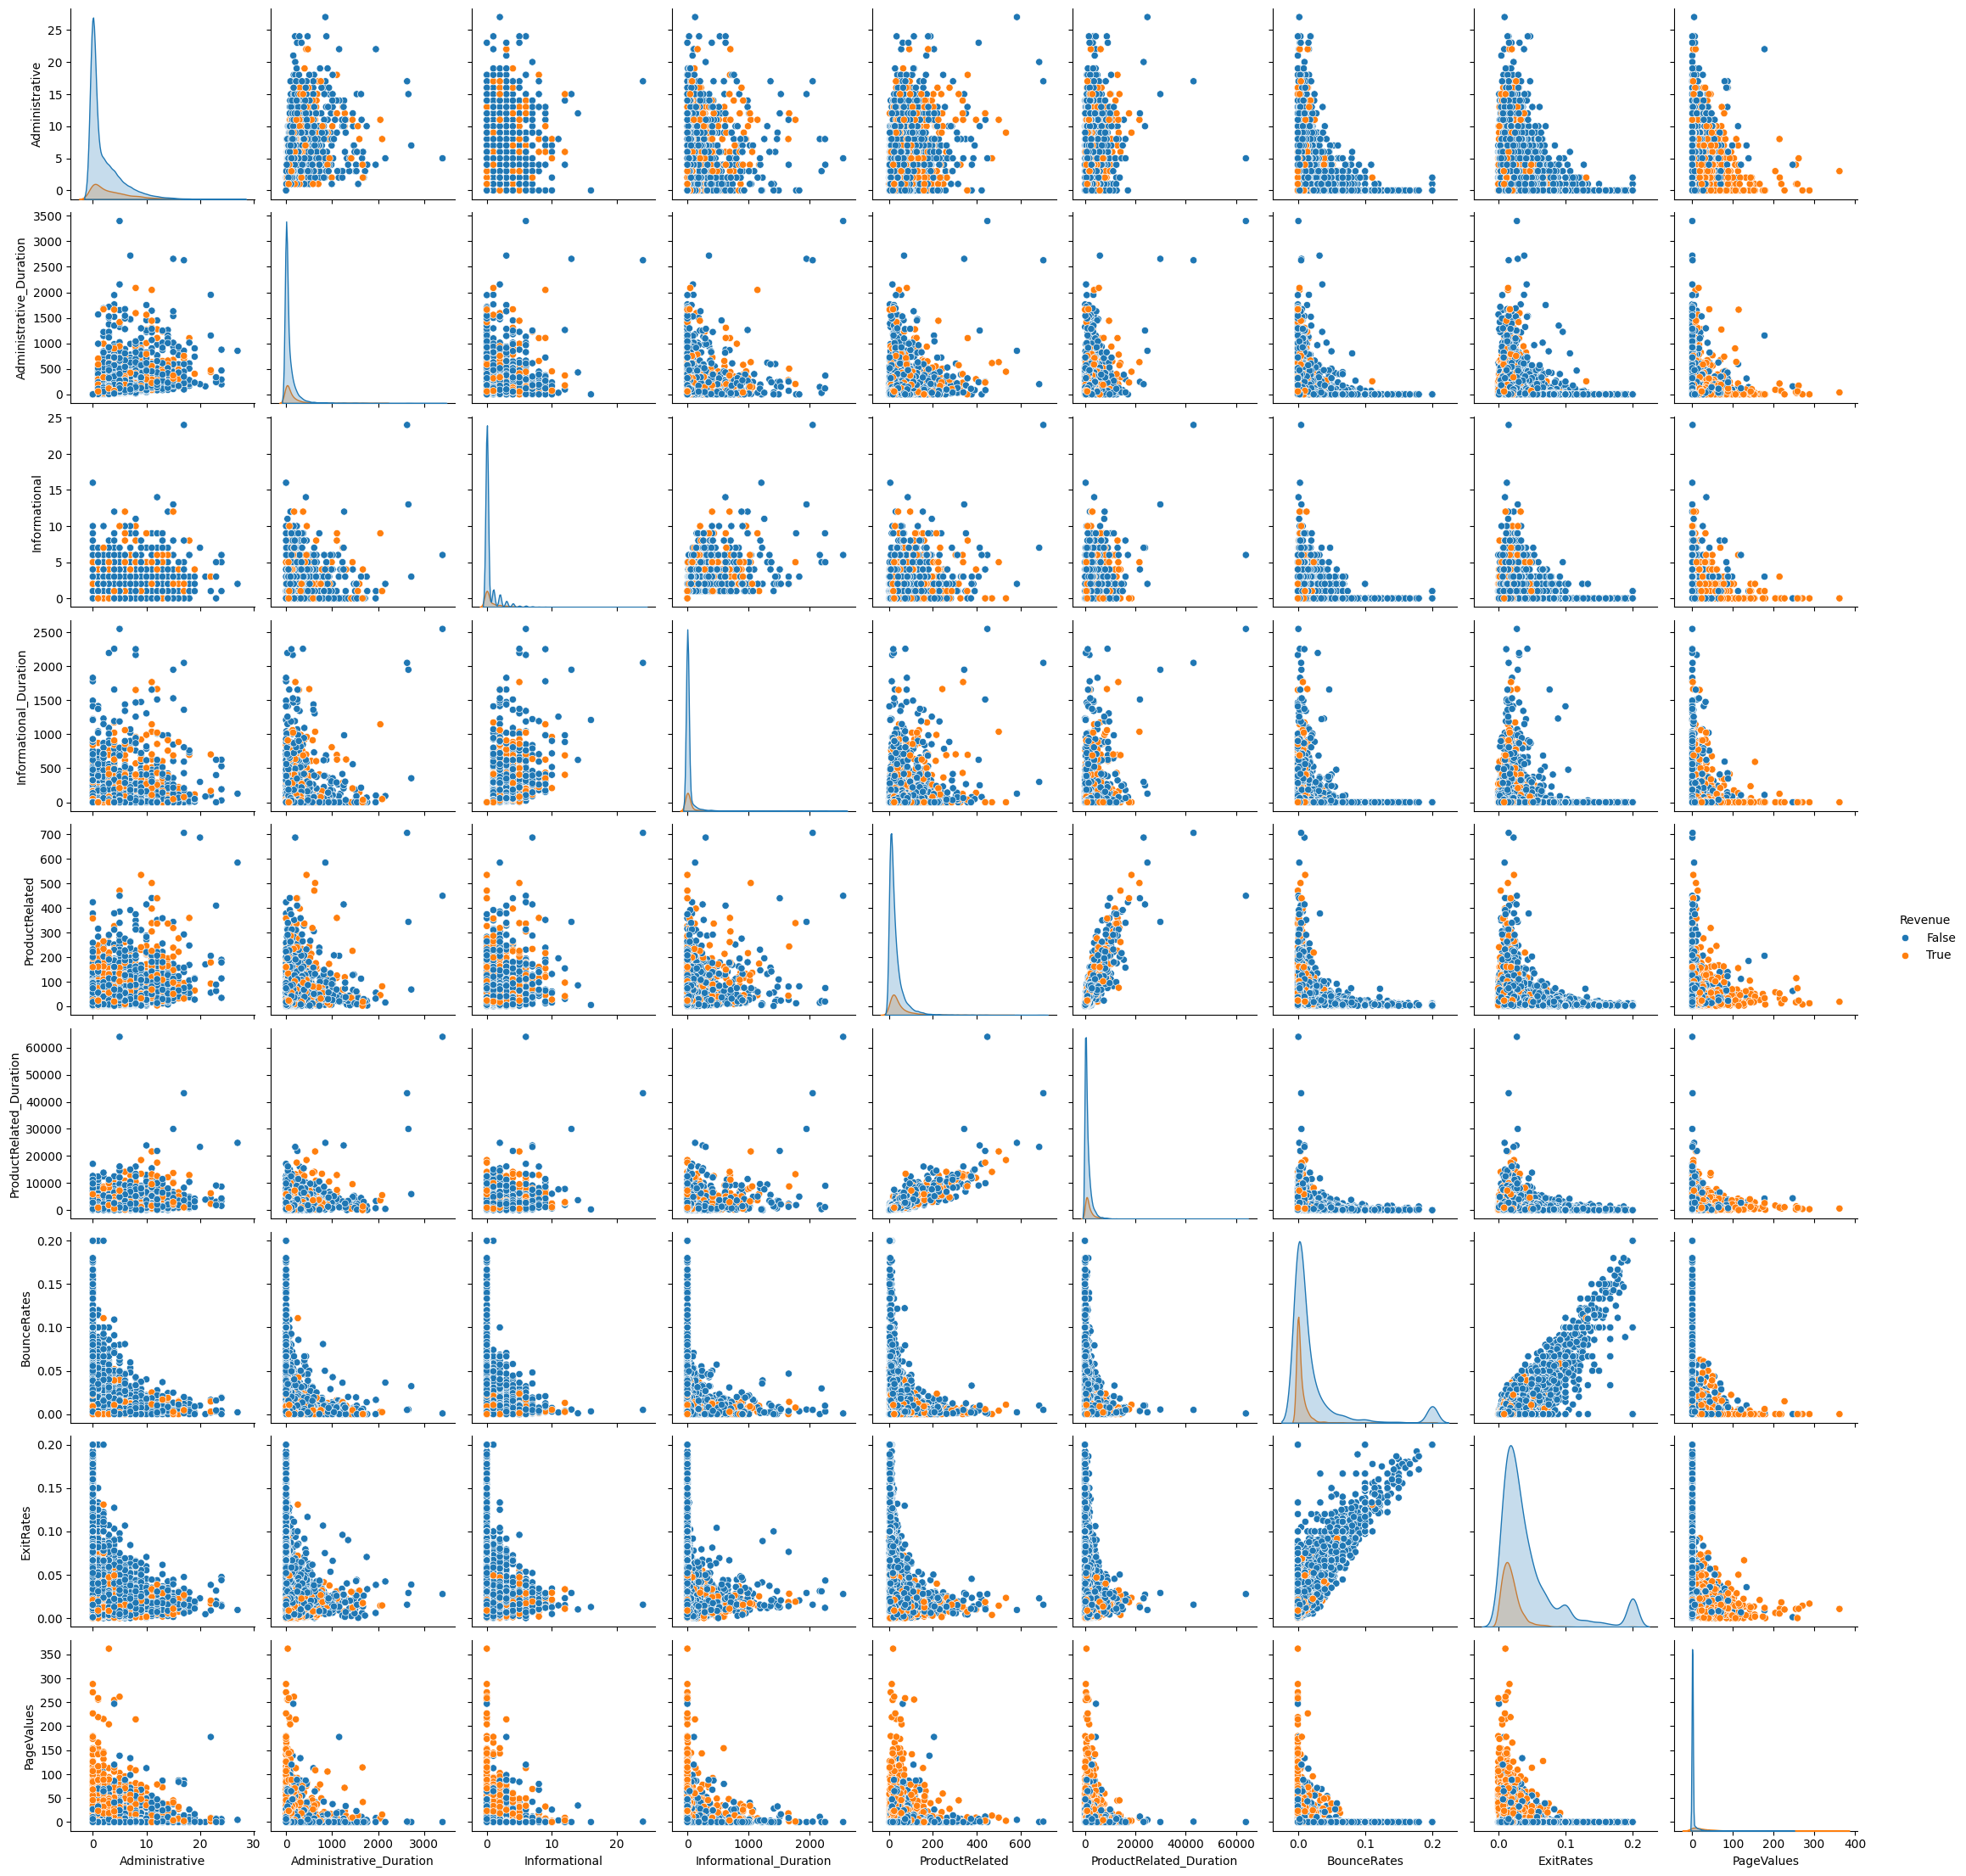

In [11]:
#pairplot only of the numerical columns
sns.pairplot(df[df.select_dtypes('number').columns.tolist()+['Revenue']].drop('SpecialDay', axis=1), hue='Revenue')
plt.show()

 We notice for example that BounceRates and ExitRates are very correlated, which is reasonable. Thi suggests that improving the content and user experience on pages with high exit rates could potentially reduce bounce rates as well, leading to better overall site performance.

Let us plot the correlation matrix to illustrate better these correlations and quantify them :

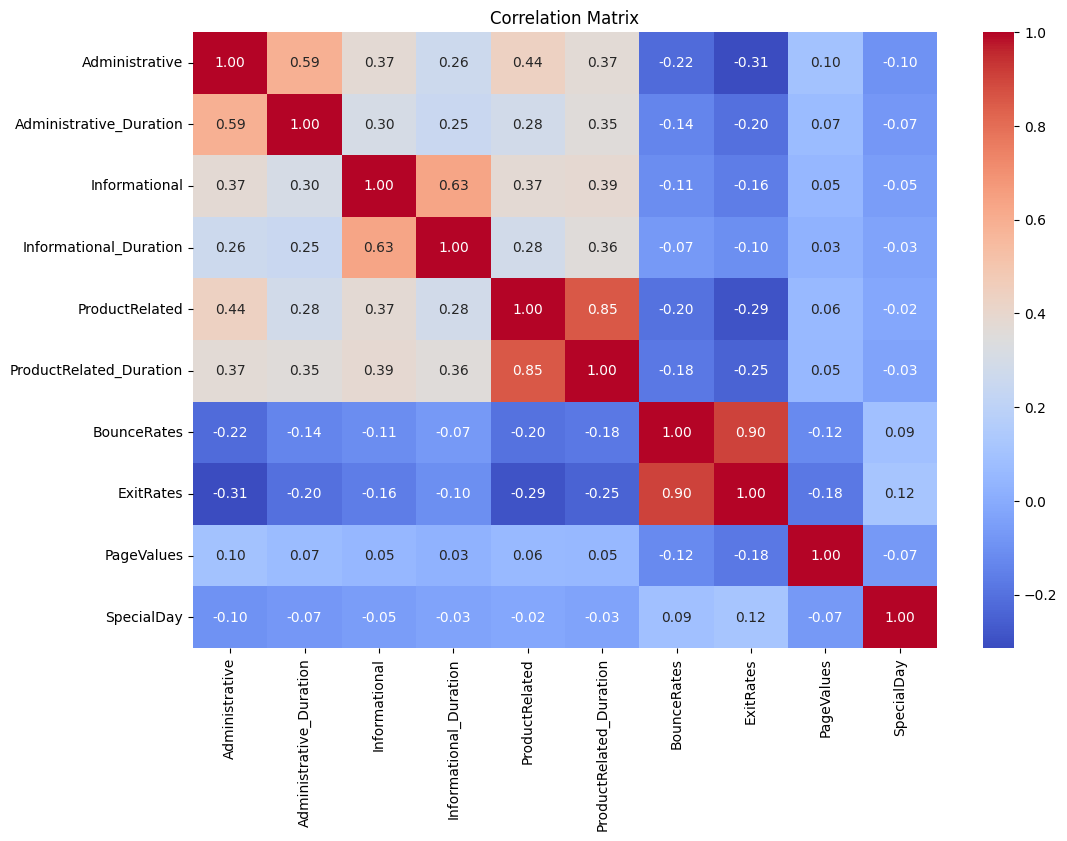

In [12]:
# plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Preprocessing and modeling

In this part , we will provide a starting kit that outlines a baseline model designed to predict the Revenue class. This model aims to determine, based on information from a session, which represents the features explored in the part before, wether the visitor will make a purchase or not.

In [13]:
# Selecting categorical and numerical fetaures
cat_cols = df.drop('Revenue', axis=1).select_dtypes(['object', 'bool']).columns.tolist()
num_cols = df.drop('Revenue', axis=1).select_dtypes('number').columns.tolist()

# Preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])


In [14]:
target = 'Revenue'
# Split data into features and target
X = df.drop(target, axis=1)
y = df[target]

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
# Define the model
model = LogisticRegression()

# Create and train the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Training the model
pipeline.fit(X_train, y_train)
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'SpecialDay']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Month', 'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'VisitorType',
                                                   'Weekend'])])),
                ('model', LogisticRegression())])

In [16]:
# Predicting on test data
y_pred = pipeline.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)

In [17]:
print('The test accuracy is : ', accuracy)
print('The test balanced accuracy is : ', balanced_accuracy)
print(report)

The test accuracy is :  0.8879795396419438
The test balanced accuracy is :  0.6877545951316443
              precision    recall  f1-score   support

       False       0.90      0.98      0.94      1650
        True       0.78      0.40      0.52       305

    accuracy                           0.89      1955
   macro avg       0.84      0.69      0.73      1955
weighted avg       0.88      0.89      0.87      1955



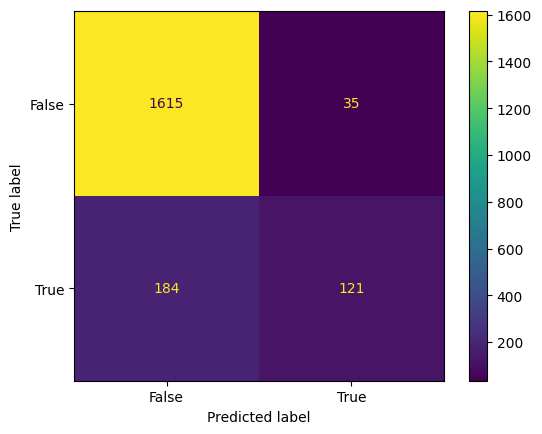

In [18]:
cm = confusion_matrix(y_test, y_pred, labels=pipeline[1].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline[1].classes_)
disp.plot()
plt.show()

As previously mentioned, the dataset exhibits significant imbalance in the target class, which notably impacts the model's balanced accuracy. This imbalance is evident from the remarquable discrepancy observed between the accuracy score (0.89) and the balanced accuracy score (0.69), highlighting the need for strategies to address this imbalance for more reliable model performance (such as using balancing techniques like SMNOTE, or specifying the class_weight='balanced' in the model,...).

## Submitting to the online challenge: [ramp.studio](https://ramp.studio) <a class="anchor" id="submitting"></a>

Once you found a good model, you can submit them to [ramp.studio](https://www.ramp.studio) to enter the online challenge. First, if it is your first time using the RAMP platform, [sign up](https://www.ramp.studio/sign_up), otherwise [log in](https://www.ramp.studio/login). Then sign up to the event [shoppers-intention](https://github.com/wiamadnan/Datacamp). Both signups are controled by RAMP administrators, so there **can be a delay between asking for signup and being able to submit**.

Once your signup request is accepted, you can go to your [sandbox]() and write the code for your classifier directly on the browser. You can also create a new folder `my_submission` in the `submissions` folder containing `classifier.py` and upload this file directly. You can check the starting-kit ([`classifier.py`](/edit/submissions/starting_kit/classifier.py)) for an example. The submission is trained and tested on our backend in the similar way as `ramp-test` does it locally. While your submission is waiting in the queue and being trained, you can find it in the "New submissions (pending training)" table in [my submissions](). Once it is trained, your submission shows up on the [public leaderboard](). 
If there is an error (despite having tested your submission locally with `ramp-test`), it will show up in the "Failed submissions" table in [my submissions](). You can click on the error to see part of the trace.

The data set we use at the backend is usually different from what you find in the starting kit, so the score may be different.

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, etc., _locally_, and checking them with `ramp-test`. The script prints mean cross-validation scores.

The official score in this RAMP (the first score column on the [leaderboard]() is the balenced accuracy score (`bal_acc`). When the score is good enough, you can submit it at the RAMP.

Here is the script proposed as the starting_kit:

In [19]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 
        'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

cat_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']


class Classifier(BaseEstimator):
    def __init__(self):
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), num_cols),
                ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
                ])
        self.model = LogisticRegression()
        self.pipe = Pipeline(steps=[('preprocessor', self.preprocessor),
                           ('model', self.model)])
    def fit(self, X, y):
        self.pipe.fit(X, y)

    def predict(self, X):
        return self.pipe.predict(X)

    def predict_proba(self, X):
        return self.pipe.predict_proba(X)

You can test your solution locally by running the ramp-test command followed by --submission <my_submission folder>. Here is an example with the starting_kit submission:

In [20]:
!ramp-test --submission starting_kit

Testing Purchasing Intention prediction for online shoppers
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions\starting_kit ...
CV fold 0
	score  bal_acc    acc      time
	train    0.691  0.888  0.107509
	valid    0.682  0.882  0.004657
	test     0.671  0.882  0.011199
CV fold 1
	score  bal_acc    acc      time
	train    0.695  0.889  0.044156
	valid    0.678  0.883  0.015685
	test     0.671  0.882  0.001183
CV fold 2
	score  bal_acc    acc      time
	train    0.676  0.883  0.030551
	valid    0.694  0.890  0.020336
	test     0.665  0.880  0.006514
----------------------------
Mean CV scores
----------------------------
	score         bal_acc             acc        time
	train   0.687 ± 0.008  0.887 ± 0.0028  0.1 ± 0.03
	valid  0.684 ± 0.0067  0.885 ± 0.0037  0.0 ± 0.01
	test   0.669 ± 0.0028  0.881 ± 0.0013   0.0 ± 0.0
----------------------------
Bagged scores
----------------------------
	score  bal_acc    acc
	valid    0.684  0.885
	test     0.669  0.8